## SSLMode

The `sslmode` connection parameter allows users to connect to their Teradata Database with additional TLS checking. These properties can be specified using the `%addconnect`, `%connect`, or `%chconnect` magics. The `sslca` and `sslcapath` connection parameters can be used to identify the location of Certificate Authority (CA) certificates to be used when `VERIFY-CA` or `VERIFY-FULL` are selected as the sslmode.

These connetion parameters have also been added to the `Add Connection Dialog`.

<div>
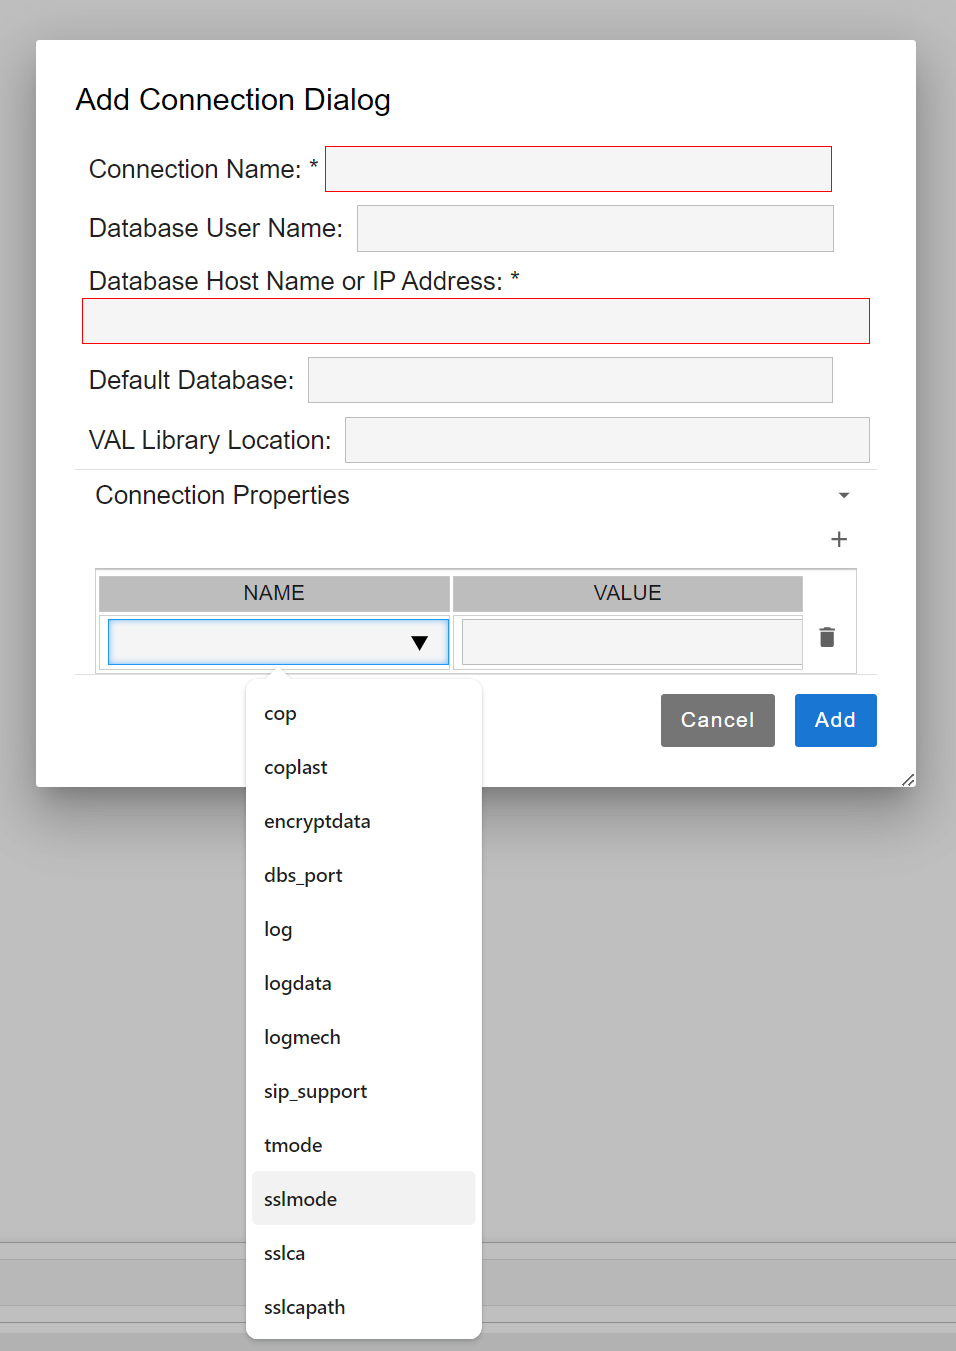
</div>

Parameter               | Default     | Type           | Description
----------------------- | ----------- | -------------- | ---
`sslmode`               | `"PREFER"`  | string         | Specifies the mode for connections to the database. Equivalent to the Teradata JDBC Driver `SSLMODE` connection parameter. Values are case-insensitive.<br/>&bull; `DISABLE` disables HTTPS/TLS connections and uses only non-TLS connections.<br/>&bull; `ALLOW` uses non-TLS connections unless the database requires HTTPS/TLS connections.<br/>&bull; `PREFER` uses HTTPS/TLS connections unless the database does not offer HTTPS/TLS connections.<br/>&bull; `REQUIRE` uses only HTTPS/TLS connections.<br/>&bull; `VERIFY-CA` uses only HTTPS/TLS connections and verifies that the server certificate is valid and trusted.<br/>&bull; `VERIFY-FULL` uses only HTTPS/TLS connections, verifies that the server certificate is valid and trusted, and verifies that the server certificate matches the database hostname.
`sslca`                 |             | string         | Specifies the file name of a PEM file that contains Certificate Authority (CA) certificates for use with `sslmode` values `VERIFY-CA` or `VERIFY-FULL`.
`sslcapath`             |             | string         | Specifies a directory of PEM files that contain Certificate Authority (CA) certificates for use with `sslmode` values `VERIFY-CA` or `VERIFY-FULL`. Only files with an extension of `.pem` are used. Other files in the specified directory are not used.


This notebook demonstrates how to create a connection using the `sslmode`, `sslca`, and `sslcapath` connection parameters. This notebook assumes that you have a valid PEM file stored in the `C:\Certificates` folder on your system. Substitute these values for whichever are appropriate for your system.

In [ ]:
%var systemName=<Vantage-system>, user=<user name>, host=<host name or IP>

In [3]:
%help addconnect

#### %addconnect
Add a Teradata Vantage database connection specification.

%addconnect name=&lt;Connection Name&gt;[, user=&lt;User Name&gt;], host=&lt;Database Server Name or IP Address&gt; [, database="&lt;Default Database&gt;"] [, props="&lt;DB Properties&gt;"] [, dbviews="ViewsV"] [, vallocation=&lt;Location of VAL Library&gt;]
 
If the **user** parameter is not provided with the %addconnect, you must provide the **&lt;User Name&gt;** value with the %connect command.

**database="&lt;Default Database&gt;"** will set the default database for the connection. Executing the DATABASE SQL command statement will take precedence over the default database connection setting.

**%help currentdb** command will display the current database value.

**props="&lt;DB Properties&gt;"** is used to set certain supported connection properties. The supported properties are:

| Property        | Default | Description
|:----------------|:--------|:----------------------------------------------------------------
| **account**     |         | Specifies the Teradata Database account.
| **cop**         | true    | Specifies whether COP Discovery is performed.
| **coplast**     | false   | Specifies how COP Discovery determines the last COP hostname.
| **dbs_port**    | 1025    | Specifies the Teradata Database port number.
| **encryptdata** | true    | Controls encryption of data to database.  It is not recommended to set this to false.
| **log**         | 0       | Controls driver debug logging.
| **logdata**     |         | Specifies extra data for the chosen logon authentication method.
| **logmech**     | TD2     | Specifies the logon authentication method. Supported values are **TD2**,**LDAP**,**TDNEGO**,**KRB5**, **BROWSER**.
| **sip_support** | true    | Controls whether StatementInfo parcel is used.
| **tmode**       | DEFAULT | Specifies the transaction mode. Possible values are **DEFAULT**, **ANSI**, or **TERA** (must be uppercase).
| **sslmode**     | PREFER  | Specifies the mode for connections to the database. Possible values are **PREFER**, **DISABLE**, **ALLOW**, **REQUIRE**, **VERIFY-CA**, **VERIFY-FULL**.
| **sslca**       |         | Specifies the file name of a PEM file that contains Certificate Authority (CA) certificates for use with sslmode values VERIFY-CA or VERIFY-FULL.
| **sslcapath**   |         | Specifies a directory of PEM files that contain Certificate Authority (CA) certificates for use with sslmode values VERIFY-CA or VERIFY-FULL. Only files with an extension of .pem are used.

For more detailed information on the supported properties see
https://github.com/Teradata/jupyterextensions/blob/master/docs/CONNECTIONPARAMETERS.md

* Multiple DB properties can be passed in a comma-separated list, e.g. props="encryptdata=false, tmode=ANSI".
* Use of any unsupported properties will be ignored or errors will be reported as appropriate.
* For additional parameters that support TLS or proxy server, please see the github link above.

**dbviews="ViewsV"** is used to set the data dictionary query to use the **V** views instead of the **VX** views.
  * By default, the VX views are used, which limits the display of database objects to only those for which 
the connected user has been granted permission.

**vallocation=&lt;Location of VAL Library&gt;** is used to specify the location of the Vantage Analytic Library (VAL) if it is installed. VAL is required in order to view data profiling information in the Navigator.
  * VAL can be downloaded from here https://downloads.teradata.com/download/database/analytics-library

The connection specification will be saved and can be used in the **%connect**, **%disconnect** and **%rmconnect** commands.

The **Connection Manager** can also be used to add Teradata connections. The Connection Manager can be
accessed from the left-hand, vertical toolbar, by selecting the Manage Teradata Connections icon. The Connection Manager will
display the list of connections, with options to **test**, **edit**, **copy/clone**, or **remove** the connection. If you hover over
a connection, the details for that connection are provided in a pop-up message. Options are also provided in the Connection Manager toolbar to
**refresh** the list of connections and **add** a new connection. With Connection Manager, if you need to add a connection property that is not
on the list above, you can type it directly in the input box.</br>

<h3>Create a connection using the sslca parameter</h3>

In [ ]:
%addconnect name=${systemName}, user=${user}, host=${host}, props="sslmode=VERIFY-CA, sslca=C:\Certificates\tls-ca-chain.pem"

In [ ]:
%connect ${systemName}

In [ ]:
%lsconnect

<h3>Create a connection using the sslcapath parameter</h3>

In [ ]:
%addconnect name=${systemName}, user=${user}, host=${host}, props="sslmode=VERIFY-FULL, sslcapath=C:\Certificates"

In [ ]:
%connect ${systemName}

In [ ]:
%lsconnect